####  Before you start running the code, please keep in mind that the application_train.csv and application_test.csv files should be in the same folder as this code is in. Also, our top 2 submissions are got by the Xgboost model and the ensemble of the Xgboost and the Logistic Regression. So, we are submitting only one file which has all the models that we tried since all the models use the same preprocessing and EDA steps. 

### Work of Team Codex - T. Surya Teja (IMT2018080) , Venkata Raghava (IMT2018023) and Abdul Hadi (IMT2018041)

In [1]:
# import numpy for math calculations
import numpy as np

# import pandas for data (csv) manipulation
import pandas as pd

# import matplotlib for plotting
import matplotlib.pyplot as plt

# import seaborn for more plotting options(built on top of matplotlib)
import seaborn as sns


# Supress unnecessary warnings so that the presentation looks clean
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the training and test data set
train = pd.read_csv("./application_train.csv")
test = pd.read_csv("./application_test.csv")

In [3]:
#Storing the SK_ID_CURR column in the skid for later use
skid = test['SK_ID_CURR']

In [4]:
#displaying information of trained data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199882 entries, 0 to 199881
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(17)
memory usage: 186.0+ MB


In [5]:
#description of train data
train.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,199882.000000,199882.000000,1.998820e+05,1.998820e+05,199872.000000,1.996970e+05,199882.000000,199882.000000,199882.000000,199882.000000,...,199882.000000,199882.000000,199882.000000,199882.000000,172899.000000,172899.000000,172899.00000,172899.000000,172899.000000,172899.000000
mean,0.081203,0.419447,1.686329e+05,5.997127e+05,27143.727080,5.391696e+05,0.020896,-16026.845549,63590.955214,-4985.351703,...,0.008260,0.000640,0.000470,0.000310,0.006385,0.006952,0.03454,0.268561,0.265386,1.903261
std,0.273147,0.726197,1.066414e+05,4.025914e+05,14585.657047,3.696706e+05,0.013859,4363.761714,141083.570901,3517.832569,...,0.090508,0.025298,0.021681,0.017609,0.083343,0.110147,0.20460,0.919726,0.875505,1.873431
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19670.000000,-2761.000000,-7468.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.485000e+05,5.172660e+05,24912.000000,4.500000e+05,0.018850,-15738.000000,-1215.000000,-4507.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34654.500000,6.795000e+05,0.028663,-12396.000000,-290.000000,-2016.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,3.000000
max,1.000000,19.000000,1.350000e+07,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7673.000000,365243.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,9.000000,8.00000,27.000000,261.000000,23.000000


<AxesSubplot:xlabel='TARGET', ylabel='count'>

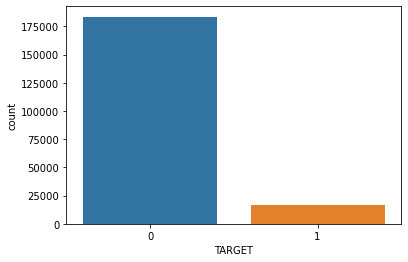

In [6]:
sns.countplot(train.TARGET)

In [7]:
#counting the variables in target column in train data set
train['TARGET'].value_counts()

0    183651
1     16231
Name: TARGET, dtype: int64

In [8]:
print("The train dataset dimensions are as follows: {}".format(train.shape))
print("The test dataset dimensions are as follows: {}".format(test.shape))

The train dataset dimensions are as follows: (199882, 122)
The test dataset dimensions are as follows: (107629, 121)


In [9]:
#printing the test data 
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,7auxod,Cash loans,F,N,Y,0,225000.0,728460.0,44694.0,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
1,xur7ur,Cash loans,F,N,Y,0,171000.0,630000.0,22756.5,630000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,2.0,6.0
2,eau6rx,Cash loans,F,N,N,0,117000.0,724981.5,27742.5,648000.0,...,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,obdr67,Revolving loans,F,N,N,2,135000.0,180000.0,9000.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,7xbu7d,Cash loans,F,N,N,0,225000.0,248760.0,29650.5,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#printing the train data
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,aou6ud,0,Cash loans,M,N,Y,0,360000.0,1125000.0,33025.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,xxbaad,0,Cash loans,F,N,Y,0,112500.0,251280.0,13630.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0
2,xdrbad,0,Cash loans,F,N,Y,0,225000.0,544491.0,15916.5,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,2.0
3,rbdd7d,0,Cash loans,F,N,N,2,211500.0,900000.0,26316.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,rexddr,1,Cash loans,F,N,Y,0,90000.0,113760.0,8406.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0


In [11]:
def missing_columns(dataframe):
    """
    Returns a dataframe that contains missing column names and 
    percent of missing values in relation to the whole dataframe.
    
    dataframe: dataframe that gives the column names and their % of missing values
    """
    
    # find the missing values
    missing_values = dataframe.isnull().sum().sort_values(ascending=False)
    
    # percentage of missing values in relation to the overall size
    missing_values_pct = 100 * missing_values/len(dataframe)
    
    # create a new dataframe which is a concatinated version
    concat_values = pd.concat([missing_values, missing_values/len(dataframe),missing_values_pct.round(1)],axis=1)

    # give new col names
    concat_values.columns = ['Missing Count','Missing Count Ratio','Missing Count %']
    
    # return the required values
    return concat_values[concat_values.iloc[:,1]!=0]

In [12]:
#getting a dataframe that contain missing column names, %missing values from train data 
missing_columns(train)

,Missing Count,Missing Count Ratio,Missing Count %
COMMONAREA_MEDI,139817,0.699498,69.9
COMMONAREA_AVG,139817,0.699498,69.9
COMMONAREA_MODE,139817,0.699498,69.9
NONLIVINGAPARTMENTS_MODE,138850,0.694660,69.5
NONLIVINGAPARTMENTS_MEDI,138850,0.694660,69.5
...,...,...,...
DEF_30_CNT_SOCIAL_CIRCLE,681,0.003407,0.3
EXT_SOURCE_2,426,0.002131,0.2
AMT_GOODS_PRICE,185,0.000926,0.1
AMT_ANNUITY,10,0.000050,0.0


In [13]:
#getting a dataframe that contain missing column names, %missing values from test data
missing_columns(test)

,Missing Count,Missing Count Ratio,Missing Count %
COMMONAREA_MEDI,75048,0.697284,69.7
COMMONAREA_AVG,75048,0.697284,69.7
COMMONAREA_MODE,75048,0.697284,69.7
NONLIVINGAPARTMENTS_MODE,74664,0.693716,69.4
NONLIVINGAPARTMENTS_MEDI,74664,0.693716,69.4
...,...,...,...
EXT_SOURCE_2,234,0.002174,0.2
AMT_GOODS_PRICE,93,0.000864,0.1
AMT_ANNUITY,2,0.000019,0.0
CNT_FAM_MEMBERS,1,0.000009,0.0


In [14]:
print("Train dataset: \n{}".format(train.dtypes.value_counts()))
print()
print("Test dataset: \n{}".format(test.dtypes.value_counts())) 

Train dataset: 
float64    65
int64      40
object     17
dtype: int64

Test dataset: 
float64    65
int64      39
object     17
dtype: int64


In [15]:
# This function converts dataframe to match columns in accordance with the training dataframe.
    
def match_dtypes(training_df,testing_df,target_name='TARGET'):
    for column_name in training_df.drop([target_name],axis=1).columns:
         testing_df[column_name]= testing_df[column_name].astype(train[column_name].dtype)
        
    return testing_df

In [16]:
# Number of unique classes in each object column
train.select_dtypes('object').apply(pd.Series.nunique)

SK_ID_CURR                    199882
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
NAME_TYPE_SUITE                    7
NAME_INCOME_TYPE                   8
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 6
NAME_HOUSING_TYPE                  6
OCCUPATION_TYPE                   18
WEEKDAY_APPR_PROCESS_START         7
ORGANIZATION_TYPE                 58
FONDKAPREMONT_MODE                 4
HOUSETYPE_MODE                     3
WALLSMATERIAL_MODE                 7
EMERGENCYSTATE_MODE                2
dtype: int64

In [17]:
# Number of unique classes in each object column
test.select_dtypes('object').apply(pd.Series.nunique)

SK_ID_CURR                    107629
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        2
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
NAME_TYPE_SUITE                    7
NAME_INCOME_TYPE                   8
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 6
NAME_HOUSING_TYPE                  6
OCCUPATION_TYPE                   18
WEEKDAY_APPR_PROCESS_START         7
ORGANIZATION_TYPE                 58
FONDKAPREMONT_MODE                 4
HOUSETYPE_MODE                     3
WALLSMATERIAL_MODE                 7
EMERGENCYSTATE_MODE                2
dtype: int64

In [18]:
# Create a label encode object having less than or equal to 2 unique values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
transform_counter = 0

# iterate through all the categorical columns
for col in train.select_dtypes('object').columns:
    
    # select only those columns where number of unique values in the category is less than or equal to 2 
    if pd.Series.nunique(train[col]) <= 2:
        train[col] = le.fit_transform(train[col].astype(str))
        test[col] = le.fit_transform(test[col].astype(str))

        transform_counter+=1
        
print("Label encoded {} columns.".format(transform_counter))

Label encoded 4 columns.


In [ ]:
# one-hot encode of categorical variables
train = pd.get_dummies(train,drop_first=True)
test = pd.get_dummies(test,drop_first=True)

In [20]:
print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (199882, 200110)
Testing Features shape:  (107629, 107855)


In [21]:
# collect the target labels to support the aligning 

target = train['TARGET']

In [22]:
#align the test data column wise
train, test = train.align(test,axis=1,join='inner')

In [23]:

train['TARGET'] = target

In [24]:
#Matches the count of columns from training set to testing set by adding extra cols and setting them to 0.
    
def match_columns(training_set,testing_set,target_label='TARGET'):
    for column in training_set.drop([target_label],axis=1).columns:
        if column not in testing_set.columns:
            testing_set[column]=0
    
    return testing_set

In [25]:
print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (199882, 228)
Testing Features shape:  (107629, 227)


In [26]:
#normalising the DAYS_BIRTH column
(train['DAYS_BIRTH']/-365).describe()

count    199882.000000
mean         43.909166
std          11.955512
min          21.021918
25%          33.961644
50%          43.117808
75%          53.890411
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Text(0.5, 0, 'Age of the client (Years)')

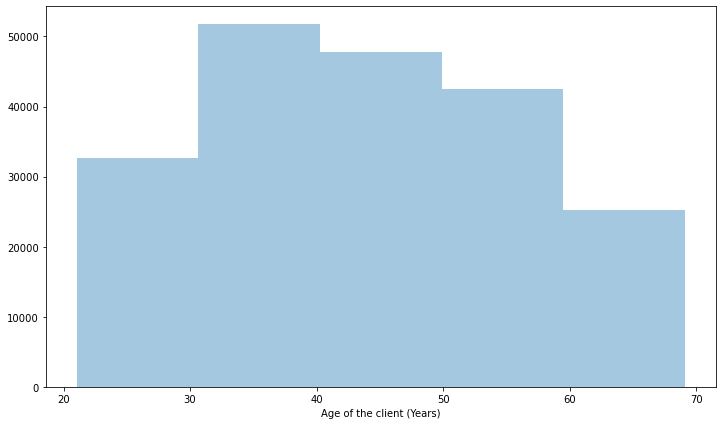

In [27]:
fig, ax = plt.subplots(figsize =(12,7))
sns.distplot(train['DAYS_BIRTH']/-365,bins=5,kde=False)
plt.xlabel("Age of the client (Years)")

In [28]:
#normalising the DAYS_EMPLOYED column
(train['DAYS_EMPLOYED']/365).describe()

count    199882.000000
mean        174.221795
std         386.530331
min         -49.073973
25%          -7.564384
50%          -3.328767
75%          -0.794521
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5, 0, 'Time before the loan application the persons started current employment(in years)')

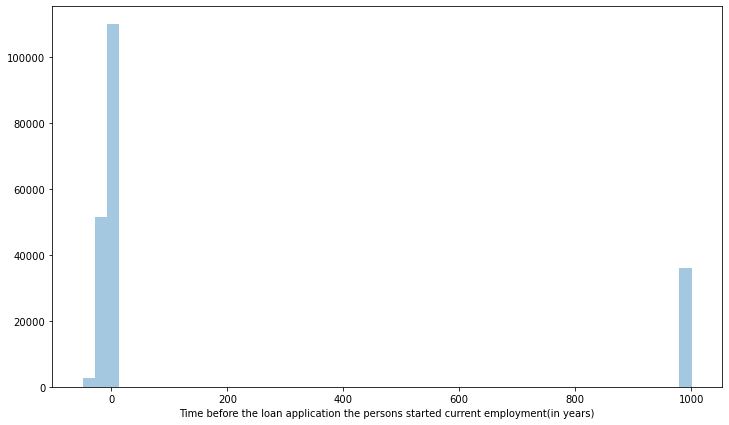

In [29]:
fig, ax = plt.subplots(figsize=(12,7))
sns.distplot(train['DAYS_EMPLOYED']/365,kde=False)
plt.xlabel("Time before the loan application the persons started current employment(in years)")

In [30]:
# find the number of records where DAYS_EMPLOYED is between [900,1100] years. 
thousand_anomalies = train[(train['DAYS_EMPLOYED']/365>=900) & (train['DAYS_EMPLOYED']/365<=1100)]
len(thousand_anomalies)

35869

<AxesSubplot:xlabel='TARGET', ylabel='count'>

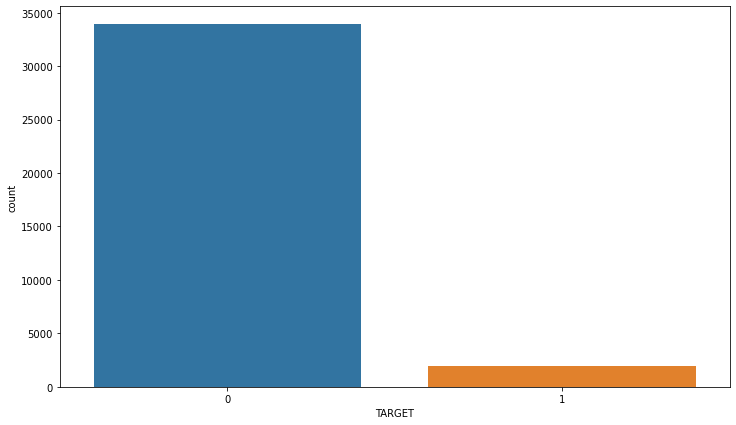

In [31]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x='TARGET',data=thousand_anomalies)

In [32]:
# get the index of anomalies and non anomalies
anomalies_index = pd.Index(thousand_anomalies.index)
non_anomalies_index = train.index.difference(anomalies_index)

In [33]:
# get the non anomalies records
non_anomalies = train.iloc[non_anomalies_index]

In [34]:
# get the anomaly targets
anomalies_target = thousand_anomalies['TARGET'].value_counts()
non_anomalies_target = non_anomalies['TARGET'].value_counts()

In [35]:
# Create an anomalous flag column
train['DAYS_EMPLOYED_ANOM'] = train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].replace({365243: np.nan})

Text(0.5, 0, 'Years worked before application')

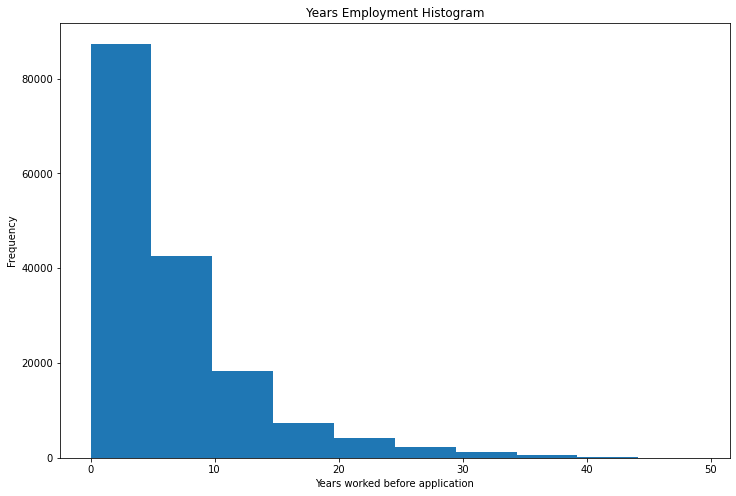

In [36]:
# Looking at the years employed for anomalies

plt.figure(figsize=(12,8))
(train['DAYS_EMPLOYED']/-365).plot.hist(title = 'Years Employment Histogram')
plt.xlabel("Years worked before application")

In [37]:
# Create an anomalous flag column
test['DAYS_EMPLOYED_ANOM'] = test["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].replace({365243: np.nan})

In [38]:
#getting the correlation value of TARGET column
corr_train = train.corr()['TARGET']

In [39]:
print(corr_train.sort_values().tail(10))
corr_train.sort_values().head(10)

CODE_GENDER_M                  0.052790
DAYS_LAST_PHONE_CHANGE         0.054519
NAME_INCOME_TYPE_Working       0.056874
REGION_RATING_CLIENT           0.059773
REGION_RATING_CLIENT_W_CITY    0.061973
DAYS_EMPLOYED                  0.076092
DAYS_BIRTH                     0.078178
TARGET                         1.000000
FLAG_MOBIL                          NaN
FLAG_DOCUMENT_12                    NaN
Name: TARGET, dtype: float64


EXT_SOURCE_3                           -0.177750
EXT_SOURCE_2                           -0.158738
EXT_SOURCE_1                           -0.155788
NAME_EDUCATION_TYPE_Higher education   -0.059378
FLOORSMAX_AVG                          -0.047607
FLOORSMAX_MEDI                         -0.047398
FLOORSMAX_MODE                         -0.046761
NAME_INCOME_TYPE_Pensioner             -0.045483
DAYS_EMPLOYED_ANOM                     -0.045234
ORGANIZATION_TYPE_XNA                  -0.045234
Name: TARGET, dtype: float64

In [40]:

from sklearn.impute import SimpleImputer
#creating the data frame name poly_fitting_vars
poly_fitting_vars = ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1','DAYS_BIRTH']
imputer = SimpleImputer(strategy = 'median')
train[poly_fitting_vars] = imputer.fit_transform(train[poly_fitting_vars])

In [41]:
#getting the shape of poly_fitting_vars
train[poly_fitting_vars].shape

(199882, 4)

In [42]:
#fitting the poly_fitting_vars into test data frame
test[poly_fitting_vars] = imputer.transform(test[poly_fitting_vars])

test[poly_fitting_vars].shape

(107629, 4)

In [43]:
from sklearn.preprocessing import PolynomialFeatures
#perform a polynomial features transform of the dataset
poly_feat = PolynomialFeatures(degree=4)

poly_interaction_train = poly_feat.fit_transform(train[poly_fitting_vars])

In [44]:
#getting the shape of poly_interaction_train
poly_interaction_train.shape

(199882, 70)

In [45]:

poly_interaction_test = poly_feat.fit_transform(test[poly_fitting_vars])

In [46]:
#getting the shape of poly_interaction_test
poly_interaction_test.shape

(107629, 70)

In [47]:
#convert the array back to a dataframe
poly_interaction_train = pd.DataFrame(poly_interaction_train,columns=poly_feat.get_feature_names(poly_fitting_vars))
poly_interaction_train.shape

(199882, 70)

In [48]:
#convert the array back to a dataframe
poly_interaction_test =  pd.DataFrame(poly_interaction_test,columns=poly_feat.get_feature_names(poly_fitting_vars))
poly_interaction_test.shape

(107629, 70)

In [49]:
#fitting the poly_interaction_train into test data frame
poly_interaction_train['TARGET'] = train['TARGET']
interaction = poly_interaction_train.corr()['TARGET'].sort_values()

In [50]:
# looking at the top 15 most positive and negative correlated interaction variables.
print(interaction.tail(15))
(interaction.head(15))

EXT_SOURCE_2^3 DAYS_BIRTH                            0.138778
EXT_SOURCE_3^2 DAYS_BIRTH                            0.140882
EXT_SOURCE_3^2 EXT_SOURCE_1 DAYS_BIRTH               0.143475
EXT_SOURCE_2^2 DAYS_BIRTH                            0.147750
EXT_SOURCE_2^2 EXT_SOURCE_1 DAYS_BIRTH               0.148778
EXT_SOURCE_3 DAYS_BIRTH                              0.149307
EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH                 0.151075
EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH                 0.154782
EXT_SOURCE_2 DAYS_BIRTH                              0.155323
EXT_SOURCE_3^2 EXT_SOURCE_2 DAYS_BIRTH               0.162843
EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH               0.166472
EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH    0.172856
EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH                 0.179538
TARGET                                               1.000000
1                                                         NaN
Name: TARGET, dtype: float64


EXT_SOURCE_3 EXT_SOURCE_2                  -0.191603
EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1     -0.187986
EXT_SOURCE_3 EXT_SOURCE_2^2                -0.174419
EXT_SOURCE_3 EXT_SOURCE_2^2 EXT_SOURCE_1   -0.173202
EXT_SOURCE_3^2 EXT_SOURCE_2                -0.170124
EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_1   -0.169373
EXT_SOURCE_2 EXT_SOURCE_1                  -0.165595
EXT_SOURCE_3 EXT_SOURCE_1                  -0.163094
EXT_SOURCE_3^2 EXT_SOURCE_2^2              -0.161024
EXT_SOURCE_3 EXT_SOURCE_2^3                -0.160356
EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1^2   -0.159590
EXT_SOURCE_2                               -0.158543
EXT_SOURCE_2^2 EXT_SOURCE_1                -0.156028
EXT_SOURCE_3                               -0.154480
EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH^2     -0.153610
Name: TARGET, dtype: float64

In [51]:
# Get the names of the columns which have the highest correlation - '1' and 'TARGET' can be dropped.
set(interaction.head(15).index).union(interaction.tail(15).index).difference(set({'1','TARGET'}))

{'EXT_SOURCE_2',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_1',
 'EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2^2 EXT_SOURCE_1',
 'EXT_SOURCE_2^2 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^3 DAYS_BIRTH',
 'EXT_SOURCE_3',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_1',
 'EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_2',
 'EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1',
 'EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1^2',
 'EXT_SOURCE_3 EXT_SOURCE_2^2',
 'EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_2^2 EXT_SOURCE_1',
 'EXT_SOURCE_3 EXT_SOURCE_2^3',
 'EXT_SOURCE_3^2 DAYS_BIRTH',
 'EXT_SOURCE_3^2 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_3^2 EXT_SOURCE_2',
 'EXT_SOURCE_3^2 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_1',
 'EXT_SOURCE_3^2 EXT_SOURCE_2^2'

In [52]:
# Choose the selected columns which have highest correlation to 'TARGET'. Columns '1' and 'TARGET' are not necessary
selected_inter_variables = list(set(interaction.head(15).index).union(interaction.tail(15).index).difference(set({'1','TARGET'})))

In [53]:
# look at the selected features in train
poly_interaction_train[selected_inter_variables].head()

,EXT_SOURCE_2^2 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_1,EXT_SOURCE_3^2 EXT_SOURCE_2,EXT_SOURCE_3^2 EXT_SOURCE_2^2,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1^2,EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2^2,EXT_SOURCE_2,EXT_SOURCE_2^2 EXT_SOURCE_1 DAYS_BIRTH,...,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2^3,EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_3^2 EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_2^3 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH
0,0.064982,0.271222,0.102608,0.036745,0.049215,-5137.766104,-1300.391479,0.068648,0.358116,-1230.959419,...,-5427.560944,-3437.320634,0.024584,6.878586e+07,-2750.124176,0.051991,-1943.696261,0.181456,-870.001159,-1839.916100
1,0.086989,0.401437,0.260075,0.107760,0.084280,-5577.570544,-1889.792111,0.136015,0.414341,-1208.624643,...,-8721.027554,-2916.978092,0.056357,6.336990e+07,-4418.910992,0.131779,-3613.482337,0.209945,-988.330339,-2311.018113
2,0.097520,0.096067,0.015770,0.006918,0.021355,-1904.147696,-723.267197,0.036490,0.438705,-1932.942296,...,-712.492851,-4406.015524,0.016008,3.267770e+07,-361.017377,0.007991,-312.574379,0.222290,-1673.571071,-835.359658
3,0.260779,0.137889,0.053128,0.038114,0.050123,-1797.246363,-1825.513366,0.140058,0.717402,-3398.993318,...,-965.255578,-4737.920960,0.100478,3.316655e+07,-489.091275,0.026920,-692.476149,0.363505,-4812.438749,-1289.347887
4,0.001972,0.221176,0.011887,0.000742,0.006992,-4068.093072,-31.247621,0.001699,0.062386,-36.272195,...,-3504.564032,-581.416027,0.000106,9.212610e+06,-1775.749065,0.006023,-218.635577,0.031611,-4.465942,-253.791875


In [54]:
# look at the selected features in test.
poly_interaction_test[selected_inter_variables].head()

,EXT_SOURCE_2^2 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_1,EXT_SOURCE_3^2 EXT_SOURCE_2,EXT_SOURCE_3^2 EXT_SOURCE_2^2,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1^2,EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2^2,EXT_SOURCE_2,EXT_SOURCE_2^2 EXT_SOURCE_1 DAYS_BIRTH,...,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2^3,EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_3^2 EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_2^3 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH
0,0.222315,0.341427,0.300754,0.199215,0.114593,-6294.891424,-5450.831264,0.295646,0.662386,-4098.830325,...,-8371.264056,-6187.979921,0.195832,1.517197e+08,-4241.687178,0.152391,-5545.006838,0.335628,-5358.255153,-4169.646992
1,0.036864,0.239289,0.060156,0.016226,0.032704,-4238.764383,-608.623451,0.034358,0.269730,-653.012112,...,-3950.633318,-2420.988554,0.009267,3.997025e+07,-2001.770650,0.030481,-1065.602480,0.136671,-347.617909,-1143.319938
2,0.133344,0.160619,0.041127,0.020166,0.043679,-1805.840492,-782.867100,0.069632,0.490338,-1499.182131,...,-943.002908,-3057.448756,0.034143,1.795044e+07,-522.991701,0.022809,-462.389797,0.271942,-1325.463711,-885.471520
3,0.045366,0.443225,0.095988,0.024138,0.079959,-3813.063293,-336.113699,0.039069,0.251469,-390.281295,...,-3283.843797,-1552.003633,0.009825,1.149876e+07,-2355.810201,0.068861,-825.785959,0.180403,-136.805933,-958.868424
4,0.084751,0.343828,0.188315,0.077016,0.071250,-5334.141822,-1760.813233,0.113498,0.408976,-1314.824272,...,-7143.485033,-3214.915389,0.046418,6.679423e+07,-3619.576287,0.095418,-2921.516237,0.207227,-1061.251416,-2181.537705


In [55]:
#cleansing the data frame - removing the unselected columns.
unselected_cols = [element for element in poly_interaction_train.columns if element not in selected_inter_variables]

In [56]:
#dropping the unselected column
poly_interaction_train = poly_interaction_train.drop(unselected_cols,axis=1)
poly_interaction_test = poly_interaction_test.drop(list(set(unselected_cols).difference({'TARGET'})),axis=1)

In [57]:
#joining EXT_SOURCE_2 and EXT_SOURCE_3 into train data frame 
train = train.join(poly_interaction_train.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3'],axis=1))

In [58]:
#joining EXT_SOURCE_2 and EXT_SOURCE_3 into test data frame 
test = test.join(poly_interaction_test.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3'],axis=1))

In [59]:
print("The train dataset dimensions are as follows: {}".format(train.shape))
print("The test dataset dimensions are as follows: {}".format(test.shape))

The train dataset dimensions are as follows: (199882, 255)
The test dataset dimensions are as follows: (107629, 254)


In [60]:
'''
1. debt-to-income ratio(DIR) = Credit amount of the loan / Total Income = AMT_CREDIT/AMT_INCOME_TOTAL
2. annuity-to-income ratio(AIR) = Loan annuity / Total Income = AMT_ANNUITY/AMT_INCOME_TOTAL
3. annuity-to-credit ratio(ACR) = Loan annuity/ Credit amount of the loan = AMT_ANNUITY/AMT_CREDIT
4. days-employed-to-age ratio(DAR) = Number of days employed/ Age of applicant = DAYS_EMPLOYED/DAYS_BIRTH
'''
#normalising some train data frame
train['DIR'] = train['AMT_CREDIT']/train['AMT_INCOME_TOTAL']
train['AIR'] = train['AMT_ANNUITY']/train['AMT_INCOME_TOTAL']
train['ACR'] = train['AMT_ANNUITY']/train['AMT_CREDIT']
train['DAR'] = train['DAYS_EMPLOYED']/train['DAYS_BIRTH']

In [61]:
#normalising some test data frame
test['DIR'] = test['AMT_CREDIT']/test['AMT_INCOME_TOTAL']
test['AIR'] = test['AMT_ANNUITY']/test['AMT_INCOME_TOTAL']
test['ACR'] = test['AMT_ANNUITY']/test['AMT_CREDIT']
test['DAR'] = test['DAYS_EMPLOYED']/test['DAYS_BIRTH']

In [62]:
#getting the correlation value of TARGET column
corr_vals = train.corr()['TARGET']

In [63]:
#printing the last 4 rows of corr_vals
corr_vals.tail(4)

DIR   -0.005668
AIR    0.016765
ACR    0.012598
DAR   -0.069443
Name: TARGET, dtype: float64

In [64]:
# Filling up all the missing values. Imputation is done for the median value of every column.
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
features = list(set(train.columns).difference({'TARGET'}))
imputer = SimpleImputer(strategy="median")

In [65]:
#transform features by scaling each feature to a given range. We are scaling all features to be between 0 and 1.
scaler = MinMaxScaler(feature_range = (0, 1))

In [66]:
#getting the original data frame for our model
imputer.fit(train.drop(['TARGET'],axis=1))
train_transformed = imputer.transform(train.drop(['TARGET'],axis=1))
test_transformed = imputer.transform(test)
train_transformed = scaler.fit_transform(train_transformed)
test_transformed = scaler.transform(test_transformed)

In [67]:
print("The train dataset dimensions are as follows: {}".format(train_transformed.shape))
print("The test dataset dimensions are as follows: {}".format(test_transformed.shape))

The train dataset dimensions are as follows: (199882, 258)
The test dataset dimensions are as follows: (107629, 258)


In [68]:
#splitting the data set into validation and training part
from sklearn.model_selection import train_test_split

X_training_set, X_validation_set, y_training_set, y_validation_set = train_test_split(train_transformed, 
                                                                                      target, test_size=0.33, random_state=42)

## Logistic Regression

In [69]:
# Starting with Logistic Regression.

from sklearn.linear_model import LogisticRegression

logistic_regressor = LogisticRegression(C = 2)

In [70]:
#fiting our model into Logistic Regression
logistic_regressor.fit(X_training_set,y_training_set)

LogisticRegression(C=2)

In [71]:
log_regression_pred = logistic_regressor.predict(X_validation_set)

In [72]:
#pd.DataFrame({'target':logistic_new})['target'].value_counts()

In [73]:
log_regression_pred_test = logistic_regressor.predict_proba(test_transformed)

In [74]:
# printing the final array of predictions.
log_regression_pred_test[:,1]

array([0.06686831, 0.11997769, 0.13229048, ..., 0.05650461, 0.06218663,
       0.11422076])

In [75]:
test

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1^2,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_2^3 DAYS_BIRTH,EXT_SOURCE_2^2 EXT_SOURCE_1 DAYS_BIRTH,DIR,AIR,ACR,DAR
0,0,0,1,0,225000.0,728460.0,44694.0,675000.0,0.006008,-18437.0,...,-5450.831264,0.114593,-4169.646992,1.517197e+08,-5358.255153,-4098.830325,3.237600,0.198640,0.061354,0.011607
1,0,0,1,0,171000.0,630000.0,22756.5,630000.0,0.014520,-17714.0,...,-608.623451,0.032704,-1143.319938,3.997025e+07,-347.617909,-653.012112,3.684211,0.133079,0.036121,NaN
2,0,0,0,0,117000.0,724981.5,27742.5,648000.0,0.025164,-11243.0,...,-782.867100,0.043679,-885.471520,1.795044e+07,-1325.463711,-1499.182131,6.196423,0.237115,0.038266,0.136263
3,1,0,0,2,135000.0,180000.0,9000.0,180000.0,0.030755,-8603.0,...,-336.113699,0.079959,-958.868424,1.149876e+07,-136.805933,-390.281295,1.333333,0.066667,0.050000,0.179472
4,0,0,0,0,225000.0,248760.0,29650.5,225000.0,0.008019,-15514.0,...,-1760.813233,0.071250,-2181.537705,6.679423e+07,-1061.251416,-1314.824272,1.105600,0.131780,0.119193,0.026428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107624,0,0,1,1,202500.0,835380.0,40320.0,675000.0,0.035792,-13076.0,...,-1088.720311,0.001660,-189.691998,2.167126e+07,-3706.773922,-645.845719,4.125333,0.199111,0.048265,0.141939
107625,0,1,0,0,450000.0,1800000.0,56520.0,1800000.0,0.002506,-14611.0,...,-5130.242935,0.117736,-3395.026696,9.789839e+07,-6558.536482,-4340.224571,4.000000,0.125600,0.031400,0.502498
107626,0,1,1,1,112500.0,301095.0,23773.5,279000.0,0.019101,-15610.0,...,-5202.312262,0.047334,-2351.365063,1.168055e+08,-5245.796922,-2371.019460,2.676400,0.211320,0.078957,0.138821
107627,1,0,1,0,94500.0,180000.0,9000.0,180000.0,0.011703,-8200.0,...,-990.353327,0.051972,-841.072942,1.361131e+07,-1741.510703,-1479.005009,1.904762,0.095238,0.050000,0.075122


In [76]:
#Submitting our model and getting output(new cell above this cell)
submission_log_regression = skid

In [79]:
x = log_regression_pred_test[:,1]
Target = pd.Series(x)

In [80]:
submission_log_regression = pd.concat([submission_log_regression, Target], axis = 1, join = 'inner')

In [81]:
submission_log_regression = submission_log_regression.rename(columns = {"SK_ID_CURR":"SK_ID_CURR", 0:"TARGET"})

In [82]:
submission_log_regression

,SK_ID_CURR,TARGET
0,7auxod,0.066868
1,xur7ur,0.119978
2,eau6rx,0.132290
3,obdr67,0.064800
4,7xbu7d,0.118804
...,...,...
107624,x7o6ud,0.235688
107625,ueexer,0.012673
107626,ou7exx,0.056505
107627,6ux6rd,0.062187


#### If you don't want to get the logistic regression model's output you needn't run the cell just below this cell. If you want to run then uncomment the cell and run it.

In [83]:
#submission_log_regression.to_csv("log_regression.csv",index=False)

### Random Forest Classifier

In [84]:
# Importing the randomforestclassifier.
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 500, random_state = 50, verbose = 1, n_jobs = -1)

In [85]:
random_forest.fit(X_training_set,y_training_set)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.1min finished


RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=50, verbose=1)

In [86]:
random_forest_pred = random_forest.predict(X_validation_set)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    1.6s finished


In [87]:
# Printing the ROC AUC scores and the accuracy scores. 
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
print("The accuracy in general is : ", accuracy_score(y_validation_set,random_forest_pred))
print("\n")
print("The classification report is as follows:\n", classification_report(y_validation_set,random_forest_pred))
print("ROC AUC score is: ",roc_auc_score(y_validation_set,random_forest_pred))

The accuracy in general is :  0.9198781116400352


The classification report is as follows:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     60661
           1       0.59      0.01      0.02      5301

    accuracy                           0.92     65962
   macro avg       0.75      0.50      0.49     65962
weighted avg       0.89      0.92      0.88     65962

ROC AUC score is:  0.504780162538177


In [88]:
# Getting the predictions of the test dataset.
random_forest_pred_test = random_forest.predict_proba(test_transformed)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    2.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    2.7s finished


In [95]:
submission_random_forest = skid
x = random_forest_pred_test[:,1]
Target = pd.Series(x)
submission_random_forest = pd.concat([submission_random_forest, Target], axis = 1, join = 'inner')
submission_random_forest = submission_random_forest.rename(columns = {"SK_ID_CURR":"SK_ID_CURR", 0:"TARGET"})

#### The cell given below gives the output of the random forest trees algorithm. If you want to run it, please uncomment it and then run it. 

In [96]:
#submission_random_forest.to_csv("random_forest.csv",index=False)

### Xgboost

In [98]:
# Importing the xgboost classifier.
from xgboost import XGBClassifier

In [99]:
xgb_classifier = XGBClassifier(n_estimators=250,max_depth=5)

In [100]:
xgb_classifier.fit(X_training_set,y_training_set)

[17:08:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [101]:
# Get the predictions of the validation set of xgboost.
xgb_pred = xgb_classifier.predict(X_validation_set)

In [103]:
# Printing the AUC scores and the accuracy scores as shown below. We do this by importing accuracy_score, classification_report and roc_auc_score.
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
print("The accuracy in general is : ", accuracy_score(y_validation_set,xgb_pred))
print("\n")
print("The classification report is as follows:\n", classification_report(y_validation_set,xgb_pred))
print("ROC AUC score is: ",roc_auc_score(y_validation_set,xgb_pred))

The accuracy in general is :  0.9181346836057124


The classification report is as follows:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     60661
           1       0.41      0.04      0.08      5301

    accuracy                           0.92     65962
   macro avg       0.67      0.52      0.52     65962
weighted avg       0.88      0.92      0.89     65962

ROC AUC score is:  0.5180353559583127


In [104]:
# Getting the predictions of test data set.
xgb_pred_test = xgb_classifier.predict_proba(test_transformed)

In [108]:
submission_xgb = skid
x = xgb_pred_test[:,1]
Target = pd.Series(x)
submission_xgb = pd.concat([submission_xgb, Target], axis = 1, join = 'inner')
submission_xgb = submission_xgb.rename(columns = {"SK_ID_CURR":"SK_ID_CURR", 0:"TARGET"})

#### The cell given below will be giving you the output of the xgboost algorithm in a .csv format for the given testing data set. Please uncomment it first incase you want to run it.

In [109]:
#submission_xgb.to_csv("xgb.csv",index=False)

### Lightgbm

In [111]:
import lightgbm as lgb

In [112]:
lgb_classifier = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=40, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [113]:
lgb_classifier.fit(X_training_set,y_training_set)

LGBMClassifier(num_leaves=40)

In [118]:
lgb_pred = lgb_classifier.predict(X_validation_set)
lgb_pred_test = lgb_classifier.predict(test_transformed)

In [119]:
submission_lgb = skid
x = lgb_pred_test
Target = pd.Series(x)
submission_lgb = pd.concat([submission_lgb, Target], axis = 1, join = 'inner')
submission_lgb = submission_lgb.rename(columns = {"SK_ID_CURR":"SK_ID_CURR", 0:"TARGET"})

#### The cell given below gives the output of the lightgbm model on the test data set. Incase you want to run it, please uncomment it first. 

In [120]:
#submission_lgb.to_csv("lgb.csv", index = False)

### Naive Bayes

In [121]:
# Importing the Naive Bayes class. 
from sklearn.naive_bayes import GaussianNB

In [122]:
bayes_class = GaussianNB()

In [123]:
bayes_class.fit(X_training_set,y_training_set)

GaussianNB()

In [124]:
bayes_preds = bayes_class.predict(X_validation_set)

In [130]:
bayes_new = bayes_class.predict(test_transformed)

In [131]:
submission_bayes = skid
x = bayes_new
Target = pd.Series(x)
submission_bayes = pd.concat([submission_bayes, Target], axis = 1, join = 'inner')
submission_bayes = submission_bayes.rename(columns = {"SK_ID_CURR":"SK_ID_CURR", 0:"TARGET"})

#### The cell given below gives the output of the Naive Bayes model on the test data set. Incase you want to run it, please uncomment it first. 

In [127]:
#submission_bayes.to_csv("bayes.csv",index=False)

# Ensembling

In [132]:
from scipy import stats
def stacked_model(X_training_set):
    """
    This method performs the stacked ensambling of the 2 best models (these 2 gave
    us the highest score in the kaggle competition) - XGBoost and Logistic Regression.
    """  
    stacked_predictions = np.array([])

    for element in X_training_set:
         stacked_predictions = np.append(stacked_predictions,stats.mode(element)[0][0])

    return stacked_predictions

In [144]:
# forming a combined array of the 2 best models i.e Logistic Regression and Xgboost. 
combined_array = (pd.DataFrame({'LR':log_regression_pred_test[:, 1],
                                'XGB':xgb_pred_test[:,1]}).values)

In [145]:
# Using the stacked ensemble inbuilt class and predicting the results of the stacked ensemble model.
stacked_model_pred = stacked_model(combined_array)

In [146]:
stacked_model_pred

array([0.06686831, 0.09355427, 0.04584508, ..., 0.05650461, 0.06218663,
       0.06499539])

In [147]:
submission_stacked = skid
x = stacked_model_pred
Target = pd.Series(x)
submission_stacked = pd.concat([submission_stacked, Target], axis = 1, join = 'inner')
submission_stacked = submission_stacked.rename(columns = {"SK_ID_CURR":"SK_ID_CURR", 0:"TARGET"})

In [148]:
submission_stacked.to_csv("stacked.csv", index = False)